## Conclusion
1. There is the flate rate of $52 and maximum of $62.5  for JFK airport trips.
2. For the average trips, there is the fare prediction model to calculate the amount fare of trips : fare increased $1.996 for every 1 mile traveled and increased $0.278 for every minutes trip rides.
3. For the further more, the high correlation between `mean_distance` and `mean_duration` is bad for linear regression model if the purpose is to draw statistical inferences about the data from model.
4. But if the purpose is to make the prediction model, the data can still be used to create an accuracte predictor.  

In [1]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Load dataset into dataframe 
df=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

In [3]:
print(df.shape)
df.info()
#create a copy of original dataframe
df_copy = df.copy()


(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

In [4]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
print(df_copy.isna().sum())
print(df_copy.drop_duplicates().shape)



Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64
(22699, 18)


In [5]:
# Use .describe()
df_copy.describe()


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [6]:
# Check the format of the data
print(df_copy["tpep_dropoff_datetime"].dtype)
df_copy["tpep_dropoff_datetime"][0]


object


'03/25/2017 9:09:47 AM'

In [7]:
# Convert datetime columns to datetime
df_copy["tpep_pickup_datetime"] = pd.to_datetime(df_copy["tpep_pickup_datetime"], format = "%m/%d/%Y %I:%M:%S %p")
df_copy["tpep_dropoff_datetime"] = pd.to_datetime(df_copy["tpep_dropoff_datetime"], format = "%m/%d/%Y %I:%M:%S %p")

print(df_copy["tpep_pickup_datetime"].dtype)
print(df_copy["tpep_dropoff_datetime"].dtype)

df_copy.head()

datetime64[ns]
datetime64[ns]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [8]:
# Create `duration` column
df_copy["duration"] = (df_copy["tpep_dropoff_datetime"] - df_copy["tpep_pickup_datetime"]) / np.timedelta64(1, "m")
df_copy.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


### Check the columns for outliers



#### Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

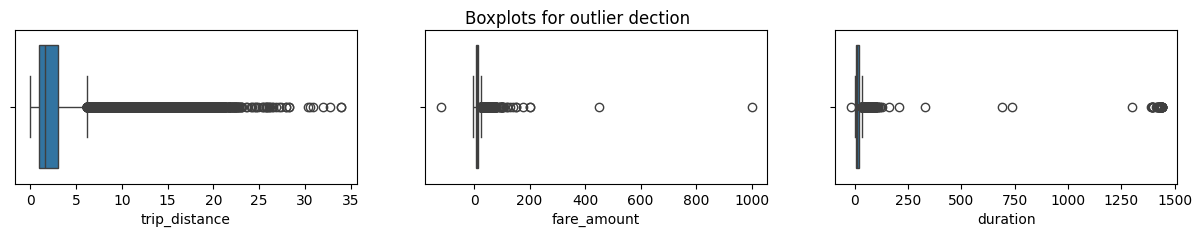

In [9]:
fig, axes = plt.subplots(1, 3, figsize = (15, 2 ))
fig.suptitle("Boxplots for outlier dection")
sns.boxplot(ax = axes[0], x = df_copy["trip_distance"])
sns.boxplot(ax = axes[1], x = df_copy["fare_amount"])
sns.boxplot(ax = axes[2], x = df_copy["duration"])
plt.show()




In [10]:
# Check if the 0 value of trip distances are the bad data or very short trips.
sorted(set(df_copy["trip_distance"]))


[0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0,
 1.01,
 1.02,
 1.03,
 1.04,
 1.05,
 1.06,
 1.07,
 1.08,
 1.09,
 1.1,
 1.11,
 1.12,
 1.13,
 1.14,
 1.15,
 1.16,
 1.17,
 1.18,
 1.19,
 1.2,
 1.21,
 1.22,
 1.23,
 1.24,
 1.25,
 1.26,
 1.27,
 1.28,
 1.29,
 1.3,
 1.31,
 1.32,
 1.33,
 1.34,
 1.35,
 1.36,
 1.37,
 1.38,
 1.39,
 1.4,
 1.41,
 1.42,
 1.43,
 1.44,


In [11]:
sum(df_copy["trip_distance"] == 0)

148

In [12]:
df_copy["fare_amount"].describe()


count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [13]:
# Impute values less than $0 with 0
df_copy.loc[df["fare_amount"] < 0, "fare_amount"] = 0
df_copy["fare_amount"].min()

0.0

Replace the outliers as `Q3 + (6 * IQR)`.

In [14]:
def outlier_imputer(data, column_list, iqr_factor):
    for col in column_list:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + (6*IQR)
        data.loc[data[col] > upper_limit, col] = upper_limit

outlier_imputer(df_copy, ["fare_amount"], 6)
df_copy["fare_amount"].describe()

count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64

In [15]:
# Call .describe() for duration outliers
df_copy["duration"].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

In [16]:
# Impute a 0 for any negative values
df_copy.loc[df_copy["duration"] < 0, "duration"] = 0
df_copy["duration"].min()

0.0

In [17]:
# Impute the high outliers
outlier_imputer(df_copy, ["duration"], 6)
df_copy["duration"].describe()

count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64

#### Create `mean_distance`, `mean_duration`

In [18]:
# Create `mean_distance``

# Create `pickup_dropoff` column
df_copy["pickup_dropoff"] = df_copy["PULocationID"].astype(str) + " " +df_copy["DOLocationID"].astype(str)

# 1. Calculate `mean_distance`` for each `pickup_dropoff` 
group_df_copy = df_copy.groupby("pickup_dropoff").mean(numeric_only = True)["trip_distance"]

# 2. Convert `grouped` to a dictionary
group_df_copy_dict = group_df_copy.to_dict()

# 3. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df_copy["mean_distance"] = df_copy["pickup_dropoff"]

# 4. Map `grouped_dict` to the `mean_distance` column
df_copy["mean_distance"] = df_copy["mean_distance"].map(group_df_copy_dict)

# 5. Confirm that it worked
df_copy[(df_copy["PULocationID"] == 1) & (df_copy["DOLocationID"] == 1)][["pickup_dropoff", "mean_distance"]]


0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickup_dropoff, dtype: object

,pickup_dropoff,mean_distance
3582,1 1,2.433333
6485,1 1,2.433333
13359,1 1,2.433333


In [22]:
# Create `mean_duration`

# 1. Calculate `mean_duration`` for each `pickup_dropoff`
group_df_copy = df_copy.groupby("pickup_dropoff").mean(numeric_only = True)["duration"]

# 2.Convert `grouped` to dictionary
group_df_copy_dict = group_df_copy.to_dict()

# 3. Create `mean_duration` column that is a copy of the pickup_dropoff helper column
df_copy["mean_duration"] = df_copy["pickup_dropoff"]

# 4. Map `grouped_dict` to the `mean_duration` column
df_copy["mean_duration"] = df_copy["mean_duration"].map(group_df_copy_dict)

# 5. Confirm that it worked
df_copy[(df_copy["PULocationID"] == 1) & (df_copy["DOLocationID"] == 1)][["pickup_dropoff", "mean_duration"]]


,pickup_dropoff,mean_duration
3582,1 1,0.466667
6485,1 1,0.466667
13359,1 1,0.466667


In [23]:
# Create 'day' col
df_copy["day"] = df_copy["tpep_pickup_datetime"].dt.day_name().str.lower()

# Create 'month' col
df_copy["month"] = df_copy["tpep_pickup_datetime"].dt.strftime("%b").str.lower()
df_copy

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.00,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.00,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.00,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.00,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.00,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,...,0.00,0.00,0.3,5.80,3.266667,48 186,1.098214,8.594643,friday,feb
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,...,14.64,5.76,0.3,73.20,40.800000,132 164,18.757500,59.560417,sunday,aug
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,...,0.00,0.00,0.3,5.30,4.133333,107 234,0.684242,6.609091,monday,sep
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,...,1.70,0.00,0.3,13.00,11.933333,68 144,2.077500,16.650000,saturday,jul


#### Create `rush_hour` binary column

Define rush hour match the condition to be 1, and other to be 0:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00


In [24]:
# Create 'rush_hour' col
df_copy["rush_hour"] = df_copy["tpep_pickup_datetime"].dt.hour
# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df_copy.loc[df_copy["day"].isin(["saturday", "sunday"]), "rush_hour"] = 0

In [25]:
def rush_hourizer(data):
    if (6 <= data["rush_hour"] < 10) or (16 <= data["rush_hour"] < 20):
        val = 1
    else:
        val = 0
    return val

In [26]:
# Apply the `rush_hourizer()` function to the new column
df_copy.loc[(df_copy["day"] != ("saturday" or "sunday"), "rush_hour")] = df_copy.apply(rush_hourizer, axis = 1)
df_copy.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_17956\1015091419.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 1 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_copy.loc[(df_copy["day"] != ("saturday" or "sunday"), "rush_hour")] = df_copy.apply(rush_hourizer, axis = 1)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0


#### Visualize the relationship between `mean_duration` and `fare_amount`.

Text(0.5, 1.0, 'mean duration x fare amount')

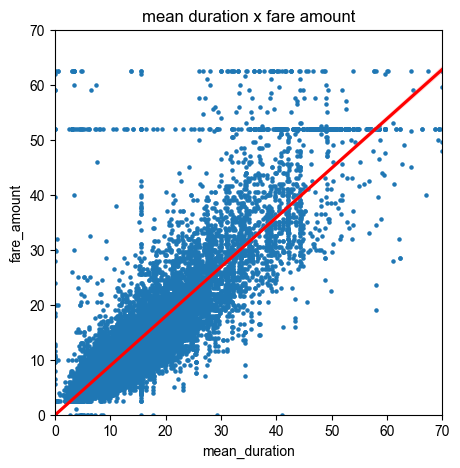

In [27]:
# Create a scatterplot to visualize the relationship between variables of interest
plt.figure(figsize=(5, 5))
sns.regplot(data = df_copy, x = "mean_duration", y = "fare_amount", 
            scatter_kws = {"alpha" : 1, "s" : 5}, 
            line_kws = {"color" : "red"})
sns.set(style = "darkgrid")
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title("mean duration x fare amount")


There are the horizontal lines around fare amounts of 52 dollars and 63 dollars.

Check the value of the rides in the second horizontal line in the scatter plot.

In [28]:
df_copy[df_copy["fare_amount"] > 50]["fare_amount"].value_counts().head()

fare_amount
52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: count, dtype: int64

Examine the first 30 of these trips.

In [29]:
# Set pandas to display all columns
df_copy[df_copy["fare_amount"] == 52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,...,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,...,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,...,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,...,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,...,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,...,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,...,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,...,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,...,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,...,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,apr,0


There are most begin and end trip for location 132, and all of them have a `RatecodeID` of 2.
The data dictionary says that `RatecodeID` of 2 indicates trips for JFK, which is John F. Kennedy International Airport. There was indeed a flat fare for taxi trips for JFK airport.

#### Isolate modeling variables

In [30]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [31]:
df_copy2 = df_copy.copy()

df_copy2 = df_copy2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


#### Visualize relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

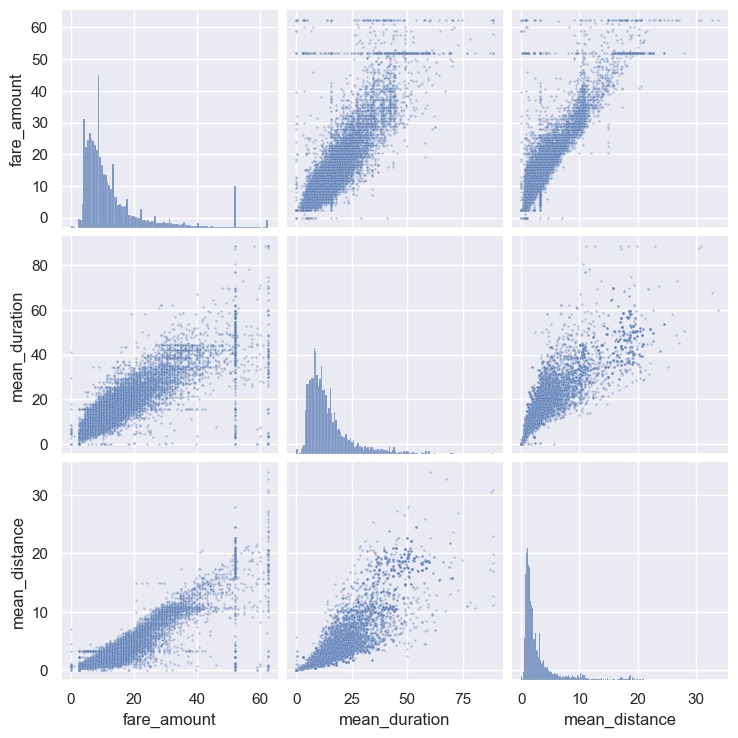

In [32]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(data = df_copy2, vars = ["fare_amount", "mean_duration", "mean_distance"],
             plot_kws = {"alpha" : 0.4, "s" : 3})

In [33]:
# Correlation matrix to help determine most correlated variables
df_copy2.corr(method = "pearson")


,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


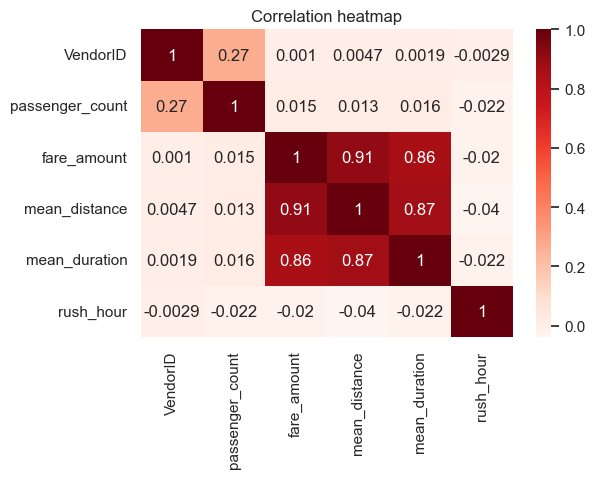

In [34]:
# Create correlation heatmap
plt.figure(figsize = (6, 4))
sns.heatmap(data = df_copy2.corr(method = "pearson"), annot = True, cmap = "Reds")
plt.title("Correlation heatmap")
plt.show()

In [35]:
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


In [36]:
# Remove the target column from the features
# X = df2.drop(columns='fare_amount')
x = df_copy2.drop(["fare_amount"], axis = 1)

# Set y variable
y = df_copy2[["fare_amount"]]

# Display first few rows
x.head()


,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


In [37]:
# Convert VendorID to string
x["VendorID"] = x["VendorID"].astype(str)

# Get dummies for modeling
x = pd.get_dummies(x, drop_first = True)
x["VendorID_2"] = x["VendorID_2"].astype(int)
x.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


### Split data into training and test sets

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)



In [39]:
# Standardize the X variables
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
print("x_train:", x_train_scaled)

x_train: [[-0.50301524  0.8694684   0.17616665 -0.64893329  0.89286563]
 [-0.50301524 -0.60011281 -0.69829589  1.54099045  0.89286563]
 [ 0.27331093 -0.47829156 -0.57301906 -0.64893329 -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.6788917  -0.64893329 -1.11998936]
 [-0.50301524 -0.58944763 -0.85743597  1.54099045 -1.11998936]
 [ 1.82596329  0.83673851  1.13212101 -0.64893329  0.89286563]]


### Fit the model

Instantiate your model and fit it to the training data.

In [40]:
# Fit your model to the training data
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

### Evaluate model

In [41]:
# Evaluate the model performance on the training data
r_sq = lr.score(x_train_scaled, y_train)
print("Coefficient of determination:", r_sq)
y_pred_train = lr.predict(x_train_scaled)
print("R^2:", r2_score(y_train, y_pred_train))
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8398434585044773
R^2: 0.8398434585044773
MAE: 2.186666416775414
MSE: 17.889732963492683
RMSE: 4.229625629236314


### Test data


In [42]:
# Scale the X_test data
x_test_scaled = scaler.transform(x_test)

In [43]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(x_test_scaled, y_test)
print("Coefficient of determination:", r_sq_test)
y_pred_test = lr.predict(x_test_scaled)
print("R^2:", r2_score(y_test, y_pred_test))
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("MAE:", mean_squared_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8682583641795454
R^2: 0.8682583641795454
MAE: 2.1336549840593864
MAE: 14.326454156998945
RMSE: 3.785030271609323


### Results


In [44]:
# Create a `results` dataframe
result = pd.DataFrame(data = {"actual" : y_test["fare_amount"],
                              "predicted" : y_pred_test.ravel()})
result["residual"] = result["actual"] - result["predicted"]
result.head()



,actual,predicted,residual
5818,14.0,12.356503,1.643497
18134,28.0,16.314595,11.685405
4655,5.5,6.726789,-1.226789
7378,15.5,16.227206,-0.727206
13914,9.5,10.536408,-1.036408


### Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

Text(0.5, 1.0, 'Actual vs. predicted')

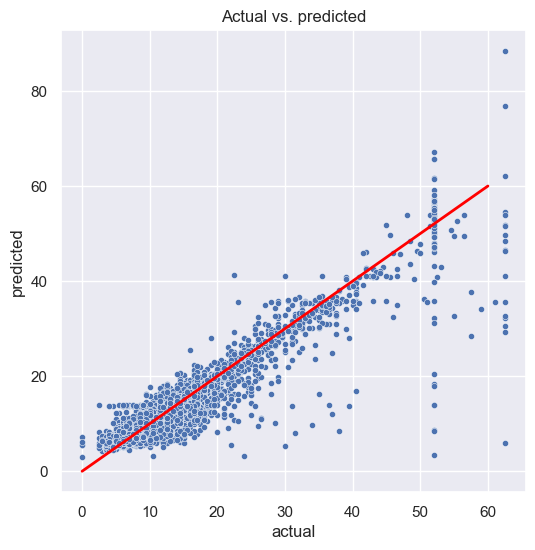

In [45]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize = (6, 6))
sns.set(style = "darkgrid")
sns.scatterplot(data = result,
                x = "actual", y = "predicted",
                s = 20 )
plt.plot([0, 60], [0, 60], c = "red", linewidth = 2)
plt.title("Actual vs. predicted")

Text(0, 0.5, 'count')

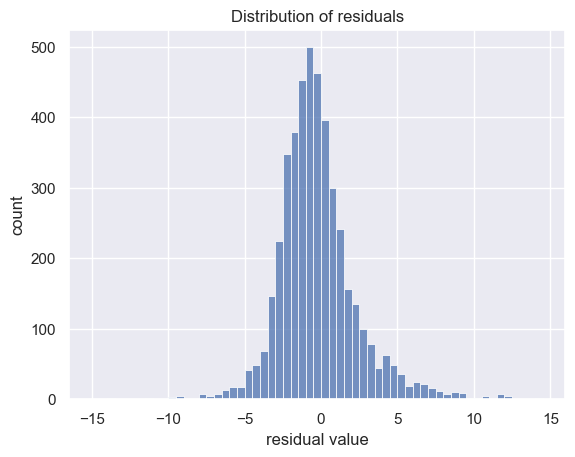

In [46]:
# Visualize the distribution of the `residuals`
sns.histplot(data = result, x = "residual", bins = np.arange(-15, 15, 0.5))
plt.title("Distribution of residuals")
plt.xlabel("residual value")
plt.ylabel("count")


In [47]:
# Calculate residual mean
result["residual"].mean()

-0.01544262152868096

Create a scatterplot of `residuals` over `predicted`.

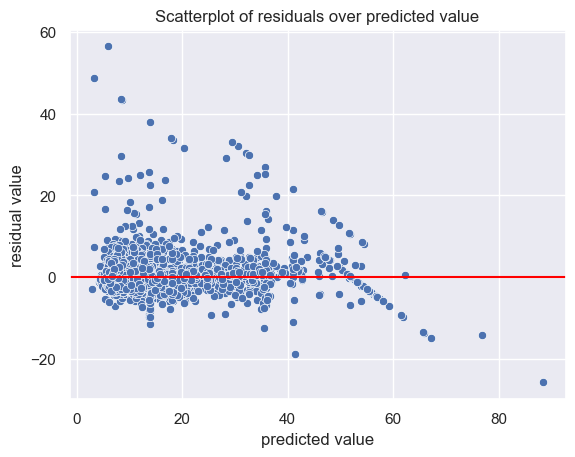

In [48]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(data = result, x = "predicted", y = "residual")
plt.axhline(0, c = "red")
plt.title("Scatterplot of residuals over predicted value")
plt.xlabel("predicted value")
plt.ylabel("residual value")
plt.show()

### Coefficients

In [49]:
# Output the model's coefficients
coefficients = pd.DataFrame(lr.coef_, columns = x.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.030825,7.133867,2.812115,0.110233,-0.054373


In [50]:
print("The standard error of mean_distance:", x_train["mean_distance"].std())
print("Fare increased for every mile", (7.133867 / x_train["mean_distance"].std()))

print("The standard error of mean_duration:", x_train["mean_duration"].std())
print("Fare increased for every duration", (2.812115 / x_train["mean_duration"].std()))





The standard error of mean_distance: 3.574812975256436
Fare increased for every mile 1.9955916713344308
The standard error of mean_duration: 10.100132624321137
Fare increased for every duration 0.27842357170918947
